# Introduction

The BIXI dataset is a collection of data related to the BIXI bike-sharing service in Montreal. It is available on https://bixi.com/en/open-data/. The data includes information about the number of purchases, number of trips, and number of users for both members and occasional users. The data is available for download in ZIP format for each year from 2014 to 2023.

The BIXI service itself operates through a network of 830 stations across the city. Users can rent a bike by scanning a QR code on the bike or entering a 5-digit code obtained at the station terminal. Once the bike is rented, users can ride for as long as they like, with each minute recorded to arrive at a personalized rate. The bike must be returned to a station to end the rental.

I have used data for month of July-2019 for my research and analysis


# Research Questions

1. What are the temporal dynamics of BIXI bike rentals throughout the day, and how do these dynamics differ between weekdays and weekends ?


2. What is the statistical distribution of BIXI bike rental durations?


3. What are the temporal dynamics of BIXI bike rentals throughout the day, and can we identify peak hours and patterns of ride demand throughout the day?

4. What are the longitudinal trends in BIXI bike rentals, and can we identify any temporal patterns or anomalies in the daily volume of rentals?

5. What are the most frequented origin and destination stations in the BIXI bike-sharing network, and how does the usage of these stations reflect the spatial dynamics of bike-sharing in Montreal?

6. How do the rental duration distributions of BIXI bike-sharing service differ between members and occasional users, and what insights can these differences provide into the usage patterns of these two user groups?

7. What are the variations in BIXI bike rentals across different days of the week, and how do these variations reflect the weekly temporal dynamics of bike-sharing usage in Montreal?

8. How do the average rental durations of BIXI bikes vary across different days of the week for members versus non-members, and what insights can these variations provide into the weekly temporal dynamics of bike-sharing usage for these two user groups?

**Steps**
1. Handling missing values and cleaning. Removing duplicate values. 

2. Feature Engineering: Creating new features from the existing data, such as extracting day of theweek and hour of the day from timestamps. 

3. Exploratory Data Analysis (EDA): Visualizing and understanding the data through statistics and graph. 

4. Analysis: Investigating ride duration and related factors. Temporal Patterns Analysis: Exploring hourly, daily, and weekly trends in ride usage. 

# Data Summary

The BIXI dataset is a collection of data related to the BIXI bike-sharing service in Montreal. The dataset contains the following columns:

1. **start_date**: The date and time when the bike rental started. This is a datetime column.
2. **start_station_code**: The code of the station where the bike rental started. This is a numerical column.
3. **end_date**: The date and time when the bike rental ended. This is a datetime column.
4. **end_station_code**: The code of the station where the bike rental ended. This is a numerical column.
5. **duration_sec**: The duration of the bike rental in seconds. This is a numerical column.
6. **is_member**: A binary column indicating whether the user is a member (1) or an occasional user (0).

The dataset can be used to analyze usage patterns of the BIXI bikes, such as the frequency of rentals, the duration of trips, and the distribution of users between members and occasional users. This could provide valuable insights into the operation and utilization of bike-sharing services. The size of data is about 1.1 million rows.

# Data Processing

The BIXI data is loaded from CSV format into a Pandas DataFrame for ease of manipulation. The DataProcessor handles missing values by dropping rows with NaN. Duplicates are also discarded to ensure data integrity.

Feature engineering through .dt DateTime accessors extracts relevant temporal features like day, hour from the start/end timestamps. This enables groupwise aggregation for trend analysis.

The data processing module, data_processing.py, utilizes the DataProcessor class to handle the initial loading of the dataset and perform essential preprocessing steps:

1. Handle Missing Values: Drops rows with missing values.
2. Remove Duplicates: Removes duplicate rows.
3. Feature Engineering: Extracts relevant features such as day, weekday, and hour from the timestamp.

In [1]:
# Importing from the module bixi_analysis

from bixi_analysis.data_processing import DataProcessor
from bixi_analysis.eda_analysis import EDAAnalyzer
from bixi_analysis.research_questions import ResearchQuestionsAnalyzer

# Initialize instance for data processor

data_processor = DataProcessor("OD_2019-07.csv")
data_processor.handle_missing_values()
data_processor.remove_duplicates()
data_processor.feature_engineering()
processed_data = data_processor.get_data()

processed_data.head(5)


,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,Start_Day,Start_Weekday,Start_Hour,End_Day,End_Weekday,End_Hour
0,2019-07-01 00:00:03,6014,2019-07-01 00:04:26,6023,262,1,1,0,0,1,0,0
1,2019-07-01 00:00:07,6036,2019-07-01 00:34:54,6052,2087,0,1,0,0,1,0,0
2,2019-07-01 00:00:11,6018,2019-07-01 00:06:48,6148,396,1,1,0,0,1,0,0
3,2019-07-01 00:00:12,6202,2019-07-01 00:17:25,6280,1032,1,1,0,0,1,0,0
4,2019-07-01 00:00:15,6018,2019-07-01 00:06:57,6148,401,1,1,0,0,1,0,0


# EDA

Initial visualization provides a high-level overview before diving into specific questions. The EDAAnalyzer plots the ride distribution between members and non-members with seaborn's countplot().

The distribution of rental durations is plotted with a histogram overlaid with kernel density estimation. This visualizes the frequency of durations and shape of the distribution.

The EDA module, eda_analysis.py, employs the EDAAnalyzer class to conduct an in-depth analysis of the processed data:

1. Plot Member Distribution: Visualizes the distribution of member and non-member rides.
2. Plot Duration Distribution: Presents the statistical distribution of ride durations.
3. Display Missing Values: Prints the count of missing values.
4. Display Data Information: Prints general information about the dataset.

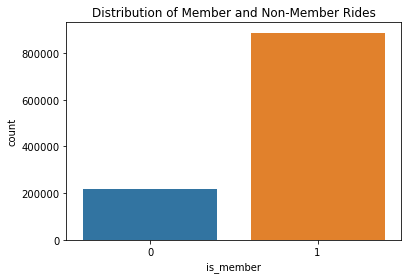

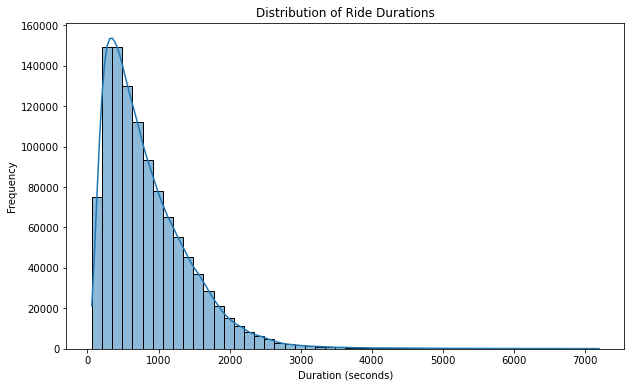



Missing Values:
 start_date            0
start_station_code    0
end_date              0
end_station_code      0
duration_sec          0
is_member             0
Start_Day             0
Start_Weekday         0
Start_Hour            0
End_Day               0
End_Weekday           0
End_Hour              0
dtype: int64


 Data Information:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102754 entries, 0 to 1102845
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_date          1102754 non-null  datetime64[ns]
 1   start_station_code  1102754 non-null  int64         
 2   end_date            1102754 non-null  datetime64[ns]
 3   end_station_code    1102754 non-null  int64         
 4   duration_sec        1102754 non-null  int64         
 5   is_member           1102754 non-null  int64         
 6   Start_Day           1102754 non-null  int64         
 7   Start_Weekday     

In [2]:
# Initialize instance for EDA analyzer
analyzer = EDAAnalyzer(processed_data)
analyzer.plot_member_distribution('is_member')
analyzer.plot_duration_distribution('duration_sec')
analyzer.display_missing_values()
analyzer.display_data_info()

# Research Questions

1. **What are the temporal dynamics of BIXI bike rentals throughout the day, and how do these dynamics differ between weekdays and weekends ?**

This question seeks to uncover the temporal patterns in BIXI bike usage during different times of the day and different days of the week. Understanding these patterns can aid in predicting demand, managing supply, and informing strategic decisions

2. **What is the statistical distribution of BIXI bike rental durations?**

This question aims to elucidate the statistical properties of BIXI bike rental durations. By analyzing the distribution of ride durations, we can gain insights into the typical usage patterns of the bike-sharing service. This information could be instrumental for optimizing resource allocation, predicting demand, and enhancing user experience.

3. **What are the temporal dynamics of BIXI bike rentals throughout the day, and can we identify peak hours and patterns of ride demand throughout the day?**

This question seeks to uncover the temporal patterns in BIXI bike usage during different times of the day.

4. **What are the longitudinal trends in BIXI bike rentals, and can we identify any temporal patterns or anomalies in the daily volume of rentals?**

This question seeks to explore the longitudinal patterns in BIXI bike usage over time. By analyzing the daily volume of rentals, we can gain insights into the temporal dynamics of the bike-sharing service

5. **What are the most frequented origin and destination stations in the BIXI bike-sharing network, and how does the usage of these stations reflect the spatial dynamics of bike-sharing in Montreal?**

This question seeks to identify the most popular start and end stations in the BIXI bike-sharing network. By analyzing the frequency of rentals at each station, we can gain insights into the spatial dynamics of bike-sharing in Montreal. 

6. **How do the rental duration distributions of BIXI bike-sharing service differ between members and occasional users, and what insights can these differences provide into the usage patterns of these two user groups?**

This question seeks to compare the rental duration distributions of members and occasional users of the BIXI bike-sharing service. By analyzing these distributions, we can gain insights into the usage patterns of these two user groups

7. **What are the variations in BIXI bike rentals across different days of the week, and how do these variations reflect the weekly temporal dynamics of bike-sharing usage in Montreal?**

This question seeks to explore the weekly temporal patterns in BIXI bike usage. By analyzing the number of rentals on each day of the week, we can gain insights into the temporal dynamics of the bike-sharing service. 

8. **How do the average rental durations of BIXI bikes vary across different days of the week for members versus non-members, and what insights can these variations provide into the weekly temporal dynamics of bike-sharing usage for these two user groups?**

This question seeks to compare the average rental durations of members and non-members of the BIXI bike-sharing service across different days of the week. By analyzing these durations, we can gain insights into the weekly temporal dynamics of bike-sharing usage for these two user groups

#### The research questions analysis module, research_questions.py, introduces the ResearchQuestionsAnalyzer class. This class addresses specific research questions through detailed visualizations and insights:

- Method: add_is_weekend_column()
* Description: Adds a new column 'is_weekend' based on the 'Start_Weekday' column.

1. Temporal Dynamics Analysis:
* Method: temporal_dynamics_analysis()
* Description: Analyzes the distribution of rides during the day on weekdays and weekends.

2. Duration Distribution Analysis:
* Method: duration_distribution_analysis()
* Description: Investigates the distribution of BIXI bike rental durations.

3. Temporal Peak Hours Analysis:
* Method: temporal_peak_hours_analysis()
* Description: Explores the hourly trends in BIXI bike usage and identifies peak hours.

4. Longitudinal Trends Analysis:
* Method: longitudinal_trends_analysis()
* Description: Examines the longitudinal trends in BIXI bike rentals.

5. Frequent Stations Analysis:
* Method: frequent_stations_analysis()
* Description: Identifies the most frequented start and end stations in the bike-sharing network.

6. User Type Duration Analysis:
* Method: user_type_duration_analysis()
* Description: Compares the rental duration distributions of members and occasional users.

7. Weekly Variations Analysis:
* Method: weekly_variations_analysis()
* Description: Explores the variations in bike rentals across different days of the week.

8. Weekly Duration Variations Analysis:
* Method: weekly_duration_variations_analysis()
* Description: Compares the average rental durations across different days of the week for members and non-members.


Research Question 1:


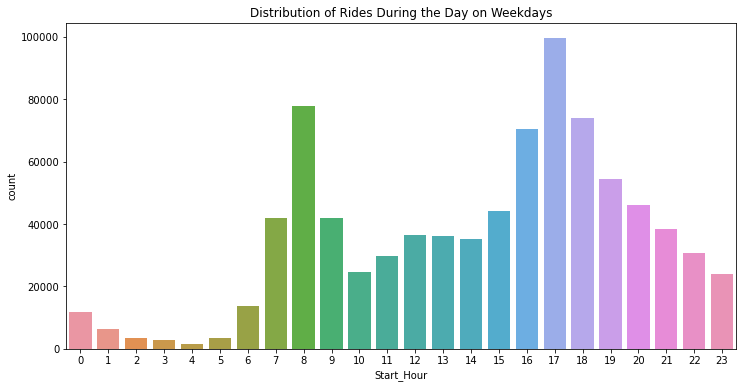

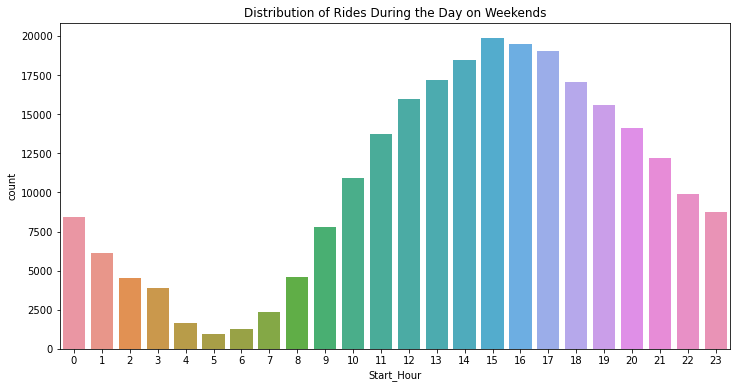

Research Question 2:


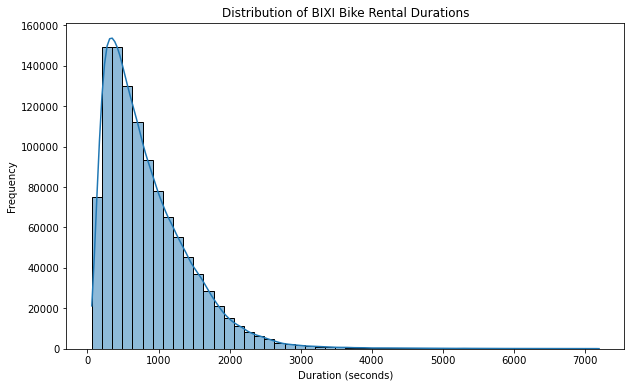

Research Question 3:


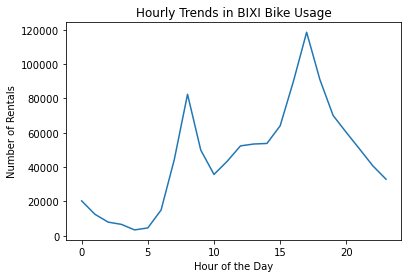

The most popular time of day for bike rentals is 17:00.
Research Question 4:


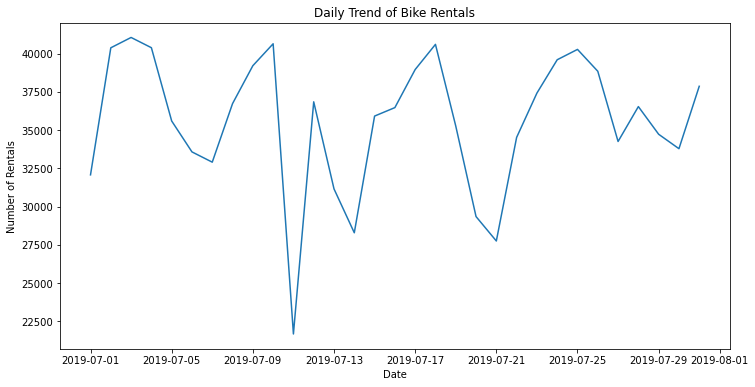

Research Question 5:


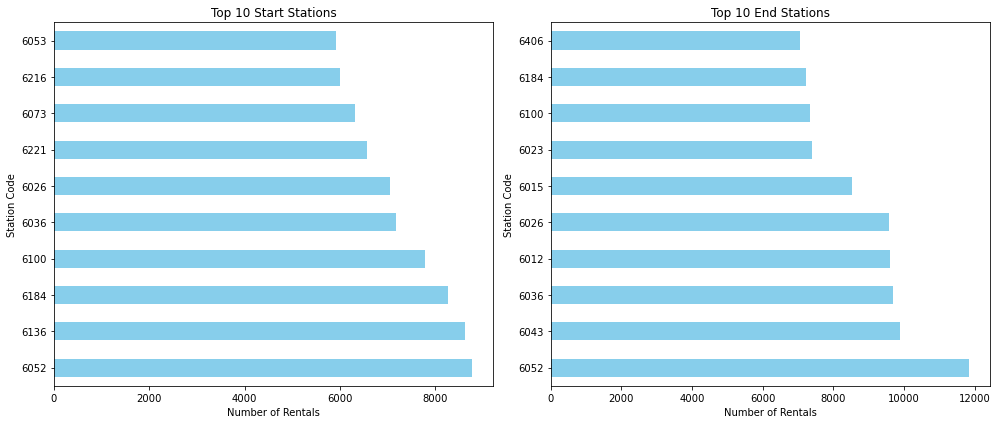

Research Question 6:


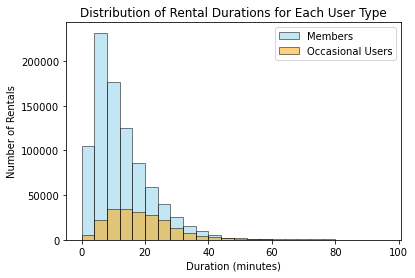

Research Question 7:


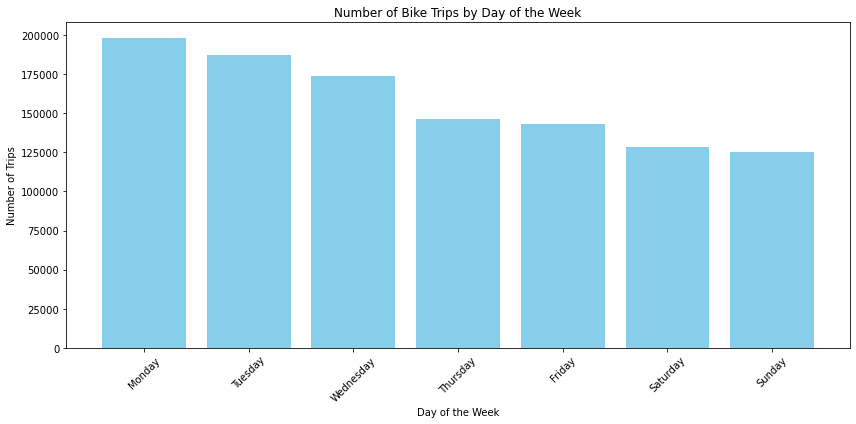

Research Question 8:


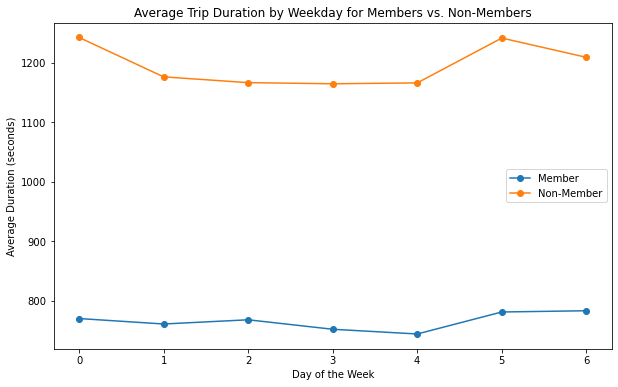

In [3]:
# Initialize instance for Rerearch Question Analyser

questions_analyzer = ResearchQuestionsAnalyzer(processed_data)
questions_analyzer.add_is_weekend_column()
print("Research Question 1:")
questions_analyzer.temporal_dynamics_analysis()
print("Research Question 2:")
questions_analyzer.duration_distribution_analysis()
print("Research Question 3:")
questions_analyzer.temporal_peak_hours_analysis()
print("Research Question 4:")
questions_analyzer.longitudinal_trends_analysis()
print("Research Question 5:")
questions_analyzer.frequent_stations_analysis()
print("Research Question 6:")
questions_analyzer.user_type_duration_analysis()
print("Research Question 7:")
questions_analyzer.weekly_variations_analysis()
print("Research Question 8:")
questions_analyzer.weekly_duration_variations_analysis()



## Conclusions
The main.py script demonstrates the execution of the entire analysis process. It loads the data, applies data processing steps, and conducts exploratory and research questions analyses.

In summary, the analysis uncovers meaningful usage patterns in the BIXI data. The code promotes reusability through the packaged classes and methods. Modular design enables collaboration and extension as well.